# 👻  **Metodos Numericos - Universidad Distrital**

<img src="https://www.udistrital.edu.co/themes/custom/versh/images/default/preloader.png" align="left" width="192px" height="192px"/>
<img align="left" width="0" height="192px" hspace="10"/>

> Juan Felipe Rodríguez Galindo  - **COD. 20181020158**

> Luis Miguel Polo H.            - **COD. 20182020158**
<br></br>
[![Juan Felipe Rodriguez Galindo](https://img.shields.io/badge/Juferoga-github-br?style=flat-square)](https://gitlab.com/Juferoga)

[![Luis Miguel Polo H.](https://img.shields.io/badge/LuisP-github-br?style=flat-square)](https://gitlab.com/#)

[![License](https://img.shields.io/badge/License-GPL_V.3-blue?style=flat-square)](https://www.gnu.org/licenses/gpl-3.0.html)

## Estudio de la pandemia

Para realizar el estudio de la pandemia proponemos el uso de los diferentes datos proporcionados a través del tiempo, tambien revisaremos en este caso la **aplicación de metodos numéricos**, con el fin de establecer un modelo que pueda generar cierta regresión para los datos obtenidos.

### Librerias Utilizadas

Para la realización de nuestro proyecto utilizaremos el lenguaje de programación python y alguna teoria básica de ciencias de datos, con el proposito de generar un informe capaz de segir la normas establecidas en el curso. Utilizaremos en este caso las librerias de python *Numpy, Pandas, Matplotlib y Dateutil* para la manipulacion de los datos obtenidos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil

# https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr

data = pd.read_csv("Casos_Positivos_Agosto14.csv", index_col='ID de caso') 

### Datos obetnidos

En este paso realizaremos una caracterización y preprocesamiento de los datos parcial, con el fin de limpiar cualquier incogruencia dentro de los datos obtenidos.

In [3]:
data

,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
ID de caso,,,,,,,,,,,,,,,,,,,,
1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN
2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN
3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN
4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433841,2020-07-16T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,60,M,En estudio,Leve,NaN,2020-07-04T00:00:00.000,NaN,2020-08-13T00:00:00.000,NaN,2020-08-13T00:00:00.000,NaN,11,NaN,NaN,NaN
433842,2020-08-10T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,24,M,En estudio,Leve,NaN,2020-08-06T00:00:00.000,NaN,2020-08-13T00:00:00.000,NaN,2020-08-13T00:00:00.000,NaN,11,NaN,NaN,NaN
433843,2020-08-09T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,52,F,En estudio,Leve,NaN,2020-08-06T00:00:00.000,NaN,2020-08-13T00:00:00.000,NaN,2020-08-13T00:00:00.000,NaN,11,NaN,NaN,NaN


In [4]:
data['Fecha de muerte'].unique()

array([nan, '2020-04-05T00:00:00.000', '2020-04-06T00:00:00.000',
       '2020-03-23T00:00:00.000', '2020-03-22T00:00:00.000',
       '2020-03-16T00:00:00.000', '2020-03-26T00:00:00.000',
       '2020-03-25T00:00:00.000', '2020-04-04T00:00:00.000',
       '2020-04-15T00:00:00.000', '2020-04-09T00:00:00.000',
       '2020-03-30T00:00:00.000', '2020-03-28T00:00:00.000',
       '2020-06-10T00:00:00.000', '2020-04-02T00:00:00.000',
       '2020-04-08T00:00:00.000', '2020-03-27T00:00:00.000',
       '2020-04-12T00:00:00.000', '2020-04-03T00:00:00.000',
       '2020-04-24T00:00:00.000', '2020-04-21T00:00:00.000',
       '2020-04-07T00:00:00.000', '2020-04-14T00:00:00.000',
       '2020-04-01T00:00:00.000', '2020-04-19T00:00:00.000',
       '2020-03-31T00:00:00.000', '2020-05-03T00:00:00.000',
       '2020-04-10T00:00:00.000', '2020-04-18T00:00:00.000',
       '2020-04-11T00:00:00.000', '2020-03-29T00:00:00.000',
       '2020-04-28T00:00:00.000', '2020-05-04T00:00:00.000',
       '2020-04-17T

In [5]:
data['Fecha diagnostico'].unique()

array(['2020-03-06T00:00:00.000', '2020-03-09T00:00:00.000',
       '2020-03-11T00:00:00.000', '2020-03-12T00:00:00.000',
       '2020-03-13T00:00:00.000', '2020-03-14T00:00:00.000',
       '2020-03-15T00:00:00.000', '2020-03-16T00:00:00.000',
       '2020-03-17T00:00:00.000', '2020-03-18T00:00:00.000',
       '2020-03-19T00:00:00.000', '2020-03-20T00:00:00.000',
       '2020-03-21T00:00:00.000', '2020-03-22T00:00:00.000',
       '2020-03-23T00:00:00.000', '2020-03-24T00:00:00.000',
       '2020-03-27T00:00:00.000', '2020-03-25T00:00:00.000',
       '2020-03-26T00:00:00.000', '2020-03-28T00:00:00.000',
       '2020-03-29T00:00:00.000', '2020-03-30T00:00:00.000',
       '2020-03-31T00:00:00.000', '2020-04-01T00:00:00.000',
       '2020-04-02T00:00:00.000', '2020-04-03T00:00:00.000',
       '2020-04-04T00:00:00.000', '2020-04-05T00:00:00.000',
       '2020-04-06T00:00:00.000', '2020-04-07T00:00:00.000',
       '2020-04-08T00:00:00.000', '2020-04-09T00:00:00.000',
       '2020-04-10T00:00

### Organizamos los Datos

Realizamos la organización de los datos en orden cronologico y con base en los aspectos fundamentales a tratar en la pandemia como lo son:

    * Fecha de diagnostico
    * Fecha de Muerte
    * Fecha de recuperado

In [7]:
data['Fecha de muerte'].replace('nan',np.nan, inplace=True)
data['Fecha de muerte'].replace('-   -',np.nan, inplace=True)
data['Fecha de muerte'].replace('/  /',np.nan, inplace=True)
data['Fecha recuperado'].replace('-   -',np.nan, inplace=True)
data['Fecha recuperado'].replace('nan',np.nan, inplace=True)
data['Fecha diagnostico'].replace('SIN DATO',np.nan, inplace=True)
data['Fecha diagnostico'].replace('nan',np.nan, inplace=True)
S1 = data['Fecha diagnostico'].dropna().apply(dateutil.parser.parse, yearfirst=True).value_counts().sort_index(ascending=True)
S2 = data['Fecha de muerte'].dropna().apply(dateutil.parser.parse, yearfirst=True).value_counts().sort_index(ascending=True)
S3 = data['Fecha recuperado'].dropna().apply(dateutil.parser.parse, yearfirst=True).value_counts().sort_index(ascending=True)

In [8]:
data['Fecha diagnostico'].unique()

array(['2020-03-06T00:00:00.000', '2020-03-09T00:00:00.000',
       '2020-03-11T00:00:00.000', '2020-03-12T00:00:00.000',
       '2020-03-13T00:00:00.000', '2020-03-14T00:00:00.000',
       '2020-03-15T00:00:00.000', '2020-03-16T00:00:00.000',
       '2020-03-17T00:00:00.000', '2020-03-18T00:00:00.000',
       '2020-03-19T00:00:00.000', '2020-03-20T00:00:00.000',
       '2020-03-21T00:00:00.000', '2020-03-22T00:00:00.000',
       '2020-03-23T00:00:00.000', '2020-03-24T00:00:00.000',
       '2020-03-27T00:00:00.000', '2020-03-25T00:00:00.000',
       '2020-03-26T00:00:00.000', '2020-03-28T00:00:00.000',
       '2020-03-29T00:00:00.000', '2020-03-30T00:00:00.000',
       '2020-03-31T00:00:00.000', '2020-04-01T00:00:00.000',
       '2020-04-02T00:00:00.000', '2020-04-03T00:00:00.000',
       '2020-04-04T00:00:00.000', '2020-04-05T00:00:00.000',
       '2020-04-06T00:00:00.000', '2020-04-07T00:00:00.000',
       '2020-04-08T00:00:00.000', '2020-04-09T00:00:00.000',
       '2020-04-10T00:00

In [9]:
frame = { 'Contagiados': S1, 'Muertos': S2, 'Recuperados': S3 } 
df=pd.DataFrame(frame).fillna(value=0)


## Gráficos

Con el fin de comprender más a cavalidad la forma en la que la pandemia se ha veniido gestando en el territorio colombiano, realizamos una serie de graficas con las cuales podemos ver más certeramente, el cual nos permitira ver de una forma más general del comportamiento de la pandemia de forma mas rápida y eficaz.

<AxesSubplot:>

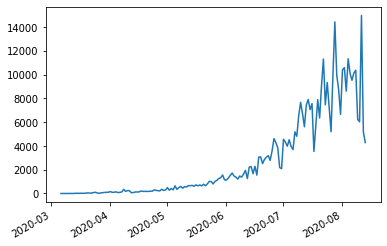

In [10]:
df['Contagiados'].plot()

<AxesSubplot:>

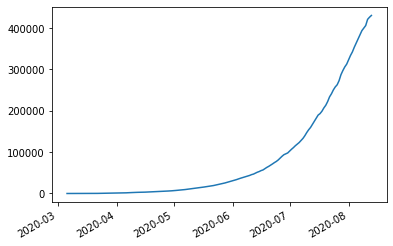

In [11]:
df['Contagiados'].cumsum().plot()

<AxesSubplot:>

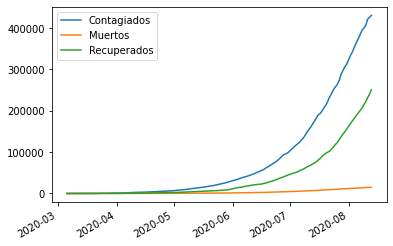

In [12]:
df.cumsum().plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

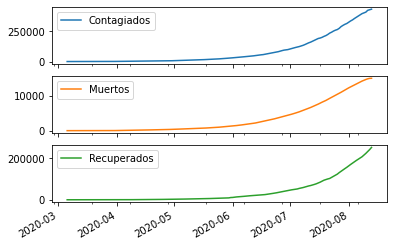

In [13]:
df.cumsum().plot(subplots=True)

<AxesSubplot:xlabel='Contagiados'>

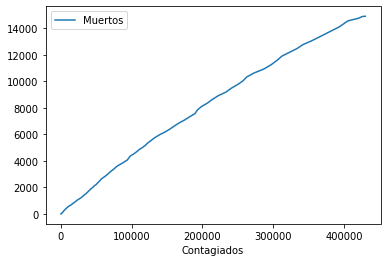

In [14]:
df.cumsum().plot(x='Contagiados', y='Muertos')



---

### Bar


---



<AxesSubplot:>

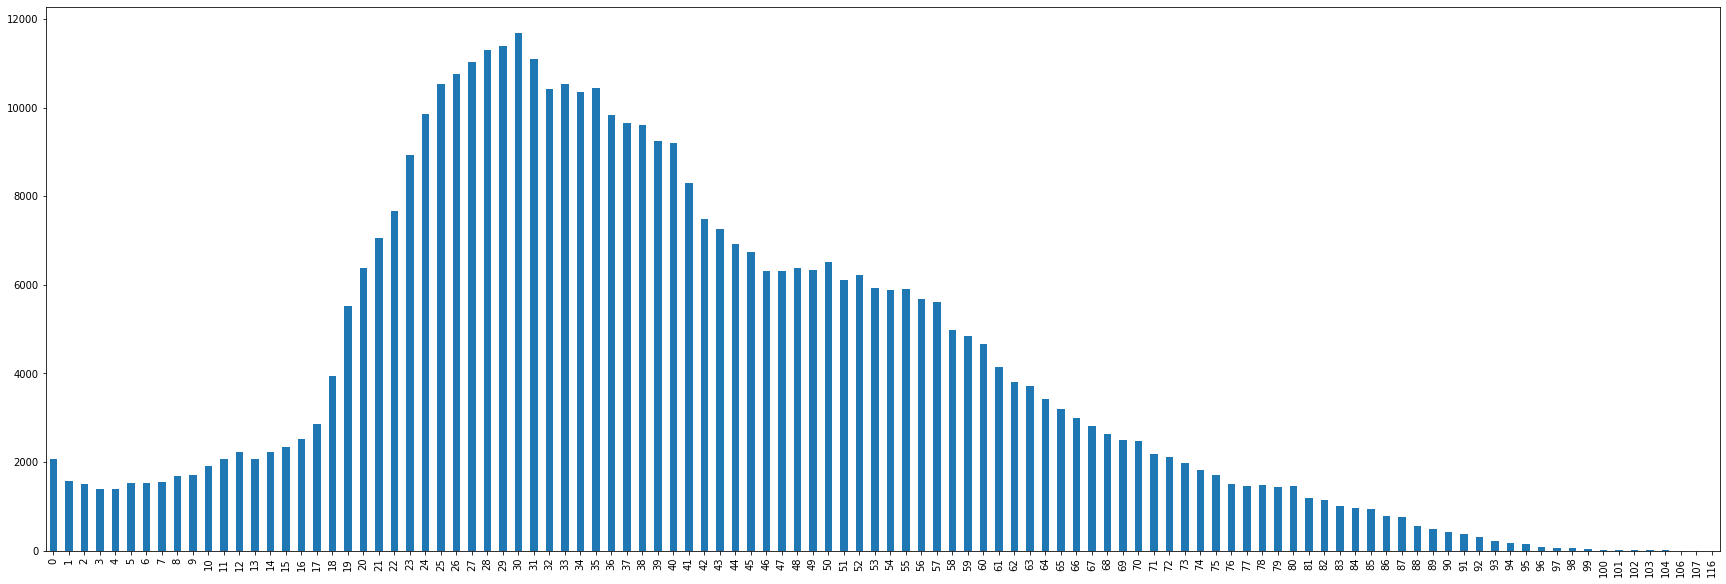

In [15]:
data['Edad'].value_counts().sort_index(ascending=True).plot(kind = 'bar', figsize=(30,10))

<AxesSubplot:>

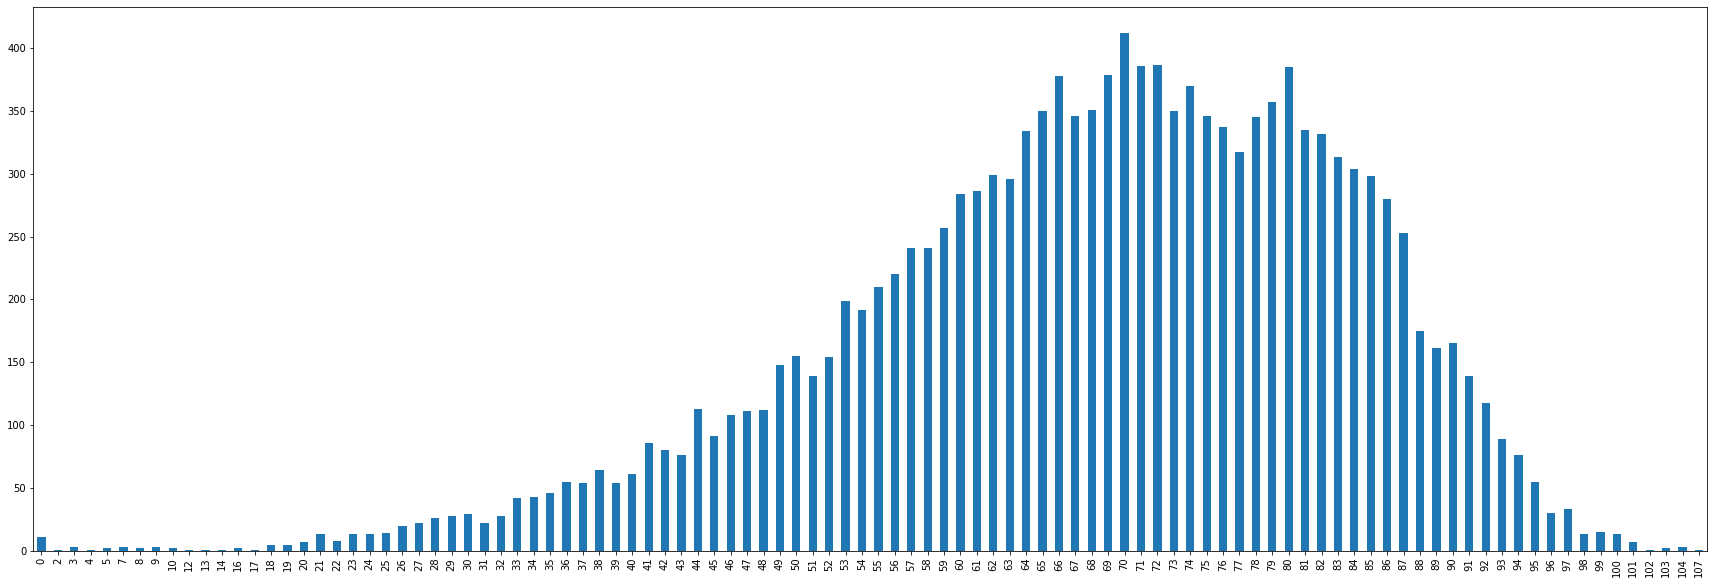

In [16]:
data['Edad'][data['Estado']=='Fallecido'].value_counts().sort_index(ascending=True).plot(kind = 'bar', figsize=(30,10))

<AxesSubplot:>

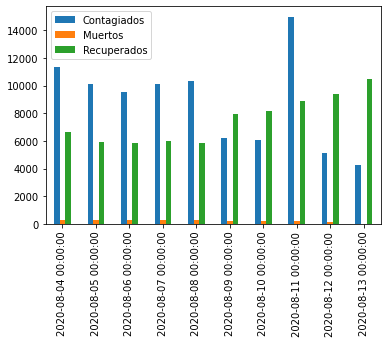

In [17]:
df.iloc[len(df)-10:,:].plot.bar()

<AxesSubplot:>

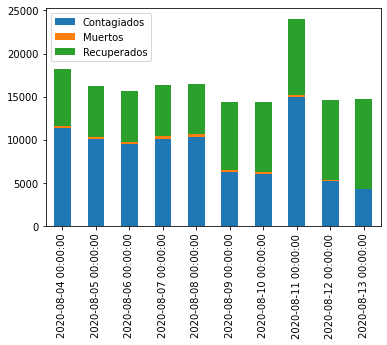

In [18]:
df.iloc[len(df)-10:,:].plot.bar(stacked=True)



---

### Hist


---



<AxesSubplot:>

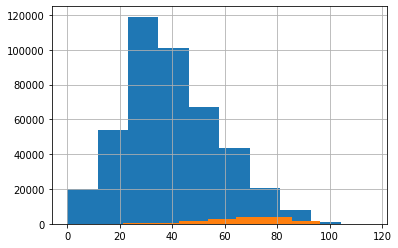

In [19]:
data['Edad'].hist(bins=10)
data['Edad'][data['Estado']=='Fallecido'].hist(bins=10)

array([[<AxesSubplot:title={'center':'Leves'}>,
        <AxesSubplot:title={'center':'Asintomáticos'}>],
       [<AxesSubplot:title={'center':'Fallecidos'}>,
        <AxesSubplot:title={'center':'Moderados'}>],
       [<AxesSubplot:title={'center':'Graves'}>, <AxesSubplot:>]],
      dtype=object)

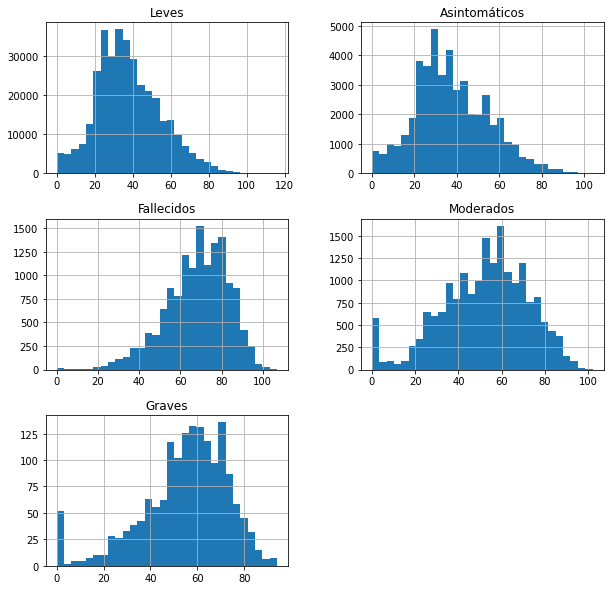

In [20]:
S4=data['Edad'][data['Estado']=='Leve']
S5=data['Edad'][data['Estado']=='Asintomático']
S6=data['Edad'][data['Estado']=='Fallecido']
S7=data['Edad'][data['Estado']=='Moderado']
S8=data['Edad'][data['Estado']=='Grave']
frame = { 'Leves': S4, 'Asintomáticos': S5, 'Fallecidos': S6, 'Moderados': S7, 'Graves': S8 } 
df1=pd.DataFrame(frame)
df1.hist(figsize=(10,10), bins=30)



---

### Box


---



<AxesSubplot:>

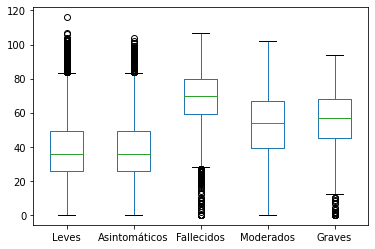

In [21]:
df1.plot.box()



---

### Area


---



<AxesSubplot:>

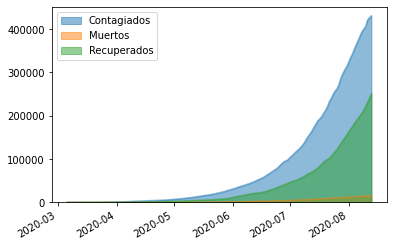

In [22]:
df.cumsum().plot.area(stacked=False)



---

### Scatter


---



<AxesSubplot:xlabel='Contagiados', ylabel='Muertos'>

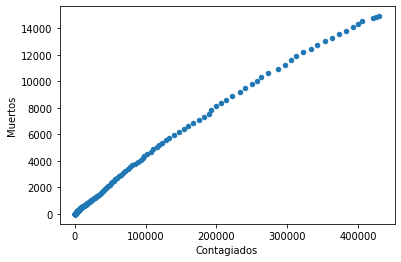

In [23]:
df.cumsum().plot.scatter(x='Contagiados', y='Muertos')



---

### Pie


---



<AxesSubplot:ylabel='Estado'>

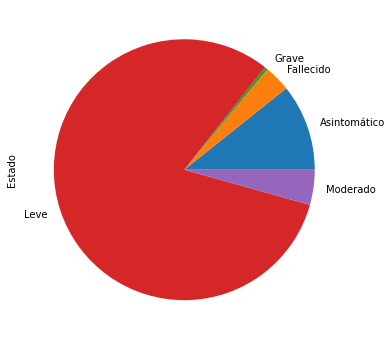

In [24]:
 explode = (0.1, 0, 0, 0, 0, 0) 
 data.groupby('Estado')['Estado'].count().plot.pie(figsize=(6, 6))

In [25]:
data['Estado'].unique()

array(['Leve', 'Asintomático', 'Fallecido', 'Moderado', 'Grave', nan],
      dtype=object)

In [26]:
data = data.replace('leve','Leve')
data['Estado'].unique()

array(['Leve', 'Asintomático', 'Fallecido', 'Moderado', 'Grave', nan],
      dtype=object)

<AxesSubplot:ylabel='Estado'>

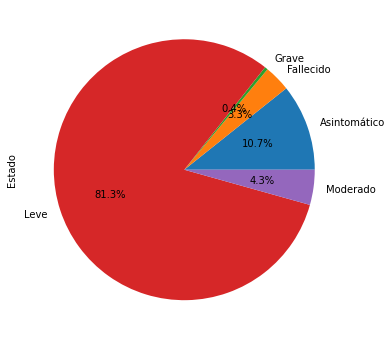

In [27]:
explode = ( 0.1, 0) 
data.groupby('Estado')['Estado'].count().plot.pie(figsize=(6, 6), autopct='%1.1f%%')

# Realizando predicciones

El resultado ultimo de todo este procesamiento de datos es el de realizar alguna predicción, Es decir fabricar el modelo que me diga en que proporcion variara la pandemia y esto realizamos en el siguiente proceso.

In [63]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(df['Contagiados'].reshape(1, -1), df['Muertos'].reshape(1, -1))  # perform linear regression
# df.cumsum().plot.scatter(x='Contagiados', y='Muertos')
#print(S2)
S122 = S3.iloc[0:146] 
#print(S122)
X,Y = S2.cumsum().values, S122.cumsum().values
linear_regressor.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
Y_pred = linear_regressor.predict(X.reshape(-1,1))  # make predictions

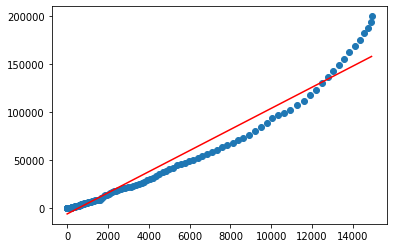

In [65]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

---

                                               Fin!
                    Metodos Numericos - Razonamiento de la pandemia🤖
 
> Juan Felipe Rodríguez Galindo  - **COD. 20181020158** 👻
> Luis Miguel Polo H. - **COD. 20182020158**